In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [72]:
main_df =pd.read_excel("Sustainability Case Study.xlsx")
main_df.head()

,id,Sales,Price,Cost,Product Footprint (kgsCo2)
0,46271,8076.22,28.35,12.9360,67.76
1,46277,6411.02,30.80,16.2960,61.60
2,46262,3423.00,95.12,42.3980,39.10
3,46281,7576.66,25.55,11.0880,61.60
4,46287,6263.48,43.86,28.7028,37.00


In [73]:
styles_df =pd.read_excel("styles.xlsx")
styles_df = styles_df.iloc[:, :-2]
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [74]:
main_df.sort_values(by='id', ascending=True)

,id,Sales,Price,Cost,Product Footprint (kgsCo2)
27901,1163,7972.58,44.72,18.6576,18.48
26758,1164,7454.88,35.36,19.0632,23.52
26430,1165,7765.50,49.40,12.3708,NaN
31355,1525,11290.20,92.00,50.4000,NaN
31343,1526,7648.20,79.00,48.9600,24.84
...,...,...,...,...,...
4147,59995,7992.96,30.80,13.7760,65.12
4122,59996,8326.00,25.55,16.8000,83.60
7369,59998,989.40,64.64,34.3400,38.80
7039,59999,1105.80,66.66,37.9760,24.00


In [75]:
styles_df.sort_values(by='id', ascending=True)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
12904,1163,Men,Apparel,Topwear,Tshirts,Blue,Summer,2011.0,Sports,Nike Sahara Team India Fanwear Round Neck Jersey
12627,1164,Men,Apparel,Topwear,Tshirts,Blue,Winter,2015.0,Sports,Nike Men Blue T20 Indian Cricket Jersey
16357,1165,Men,Apparel,Topwear,Tshirts,Blue,Summer,2013.0,Sports,Nike Mean Team India Cricket Jersey
9208,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Fall,2010.0,Casual,Puma Deck Navy Blue Backpack
33222,1526,Unisex,Accessories,Bags,Backpacks,Black,Fall,2010.0,Sports,Puma Big Cat Backpack Black
...,...,...,...,...,...,...,...,...,...,...
16535,59995,Women,Apparel,Dress,Dresses,Black,Fall,2012.0,Party,Avirate Black Dress
36979,59996,Women,Apparel,Dress,Dresses,Purple,Summer,2014.0,Casual,Avirate Black & Purple Dress
36342,59998,Women,Footwear,Shoes,Heels,Multi,Winter,2015.0,Casual,Catwalk Women Multi Coloured Heels
34690,59999,Women,Footwear,Shoes,Heels,Bronze,Winter,2015.0,Casual,Catwalk Women Bronze Wedges


In [76]:
merged_df = pd.merge(main_df, styles_df, on='id', how='inner')
merged_df.head()

,id,Sales,Price,Cost,Product Footprint (kgsCo2),gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,46271,8076.22,28.35,12.9360,67.76,Women,Apparel,Dress,Dresses,Blue,Summer,2012.0,Casual,109F Blue A-Line Dress
1,46277,6411.02,30.80,16.2960,61.60,Women,Apparel,Dress,Dresses,Red,Summer,2012.0,Casual,109F Red & White A-Line Dress
2,46262,3423.00,95.12,42.3980,39.10,Women,Apparel,Topwear,Tops,Beige,Summer,2012.0,Casual,109F Women Beige Embroidered Top
3,46281,7576.66,25.55,11.0880,61.60,Women,Apparel,Dress,Dresses,Black,Summer,2012.0,Casual,109F Women Black & Cream Dress
4,46287,6263.48,43.86,28.7028,37.00,Women,Apparel,Topwear,Tunics,Black,Summer,2012.0,Casual,109F Women Black & Cream-Coloured Colourblocke...


In [77]:
merged_df["masterCategory"].nunique()

7

In [78]:
merged_df["QTY"] = merged_df["Sales"]/merged_df["Price"]
merged_df.head()

,id,Sales,Price,Cost,Product Footprint (kgsCo2),gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,QTY
0,46271,8076.22,28.35,12.9360,67.76,Women,Apparel,Dress,Dresses,Blue,Summer,2012.0,Casual,109F Blue A-Line Dress,284.875485
1,46277,6411.02,30.80,16.2960,61.60,Women,Apparel,Dress,Dresses,Red,Summer,2012.0,Casual,109F Red & White A-Line Dress,208.150000
2,46262,3423.00,95.12,42.3980,39.10,Women,Apparel,Topwear,Tops,Beige,Summer,2012.0,Casual,109F Women Beige Embroidered Top,35.986123
3,46281,7576.66,25.55,11.0880,61.60,Women,Apparel,Dress,Dresses,Black,Summer,2012.0,Casual,109F Women Black & Cream Dress,296.542466
4,46287,6263.48,43.86,28.7028,37.00,Women,Apparel,Topwear,Tunics,Black,Summer,2012.0,Casual,109F Women Black & Cream-Coloured Colourblocke...,142.806202


In [79]:
stats_df=merged_df.groupby(['subCategory'])['Product Footprint (kgsCo2)'].agg(['max', 'min', 'mean']).reset_index()
stats_df.rename(columns={'mean': 'average'}, inplace=True)
stats_df.head()

,subCategory,max,min,average
0,Accessories,90.21,13.11,45.282846
1,Apparel Set,96.00,46.90,76.015000
2,Bags,96.00,6.00,55.517074
3,Bath and Body,88.00,22.25,63.640909
4,Beauty Accessories,70.40,61.60,65.600000


In [80]:
merged_df.head()

,id,Sales,Price,Cost,Product Footprint (kgsCo2),gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,QTY
0,46271,8076.22,28.35,12.9360,67.76,Women,Apparel,Dress,Dresses,Blue,Summer,2012.0,Casual,109F Blue A-Line Dress,284.875485
1,46277,6411.02,30.80,16.2960,61.60,Women,Apparel,Dress,Dresses,Red,Summer,2012.0,Casual,109F Red & White A-Line Dress,208.150000
2,46262,3423.00,95.12,42.3980,39.10,Women,Apparel,Topwear,Tops,Beige,Summer,2012.0,Casual,109F Women Beige Embroidered Top,35.986123
3,46281,7576.66,25.55,11.0880,61.60,Women,Apparel,Dress,Dresses,Black,Summer,2012.0,Casual,109F Women Black & Cream Dress,296.542466
4,46287,6263.48,43.86,28.7028,37.00,Women,Apparel,Topwear,Tunics,Black,Summer,2012.0,Casual,109F Women Black & Cream-Coloured Colourblocke...,142.806202


In [81]:
merged_df = pd.merge(merged_df, stats_df, on='subCategory', how='left')
merged_df['CO2'] = merged_df.apply(lambda row: 'greater' if row['Product Footprint (kgsCo2)'] > row['average'] else 'lower', axis=1)
print(merged_df.head())

      id    Sales  Price     Cost  Product Footprint (kgsCo2) gender  \
0  46271  8076.22  28.35  12.9360                       67.76  Women   
1  46277  6411.02  30.80  16.2960                       61.60  Women   
2  46262  3423.00  95.12  42.3980                       39.10  Women   
3  46281  7576.66  25.55  11.0880                       61.60  Women   
4  46287  6263.48  43.86  28.7028                       37.00  Women   

  masterCategory subCategory articleType baseColour  season    year   usage  \
0        Apparel       Dress     Dresses       Blue  Summer  2012.0  Casual   
1        Apparel       Dress     Dresses        Red  Summer  2012.0  Casual   
2        Apparel     Topwear        Tops      Beige  Summer  2012.0  Casual   
3        Apparel       Dress     Dresses      Black  Summer  2012.0  Casual   
4        Apparel     Topwear      Tunics      Black  Summer  2012.0  Casual   

                                  productDisplayName         QTY   max    min  \
0          

In [82]:
merged_df.head()

,id,Sales,Price,Cost,Product Footprint (kgsCo2),gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,QTY,max,min,average,CO2
0,46271,8076.22,28.35,12.9360,67.76,Women,Apparel,Dress,Dresses,Blue,Summer,2012.0,Casual,109F Blue A-Line Dress,284.875485,88.0,52.26,70.304186,lower
1,46277,6411.02,30.80,16.2960,61.60,Women,Apparel,Dress,Dresses,Red,Summer,2012.0,Casual,109F Red & White A-Line Dress,208.150000,88.0,52.26,70.304186,lower
2,46262,3423.00,95.12,42.3980,39.10,Women,Apparel,Topwear,Tops,Beige,Summer,2012.0,Casual,109F Women Beige Embroidered Top,35.986123,97.0,8.10,24.064668,greater
3,46281,7576.66,25.55,11.0880,61.60,Women,Apparel,Dress,Dresses,Black,Summer,2012.0,Casual,109F Women Black & Cream Dress,296.542466,88.0,52.26,70.304186,lower
4,46287,6263.48,43.86,28.7028,37.00,Women,Apparel,Topwear,Tunics,Black,Summer,2012.0,Casual,109F Women Black & Cream-Coloured Colourblocke...,142.806202,97.0,8.10,24.064668,greater


In [83]:
merged_df.groupby(['subCategory',"CO2"])['CO2'].agg(["count"])

count
subCategory  CO2           
Accessories  greater     68
             lower       75
Apparel Set  greater     47
             lower       59
Bags         greater   1600
...                     ...
Watches      lower     1424
Water Bottle greater      3
             lower        4
Wristbands   greater      2
             lower        2

[88 rows x 1 columns]

In [84]:
columns_to_drop = ['max_x', 'min_x', 'mean_x', 'max_y', 'min_y', 'mean_y', 'average_x',"average_y","c02"]
merged_df.drop(columns=columns_to_drop, inplace=True)
merged_df.head()

KeyError: "['max_x', 'min_x', 'mean_x', 'max_y', 'min_y', 'mean_y', 'average_x', 'average_y', 'c02'] not found in axis"

In [86]:
merged_df.head()

,id,Sales,Price,Cost,Product Footprint (kgsCo2),gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,QTY,max,min,average,CO2
0,46271,8076.22,28.35,12.9360,67.76,Women,Apparel,Dress,Dresses,Blue,Summer,2012.0,Casual,109F Blue A-Line Dress,284.875485,88.0,52.26,70.304186,lower
1,46277,6411.02,30.80,16.2960,61.60,Women,Apparel,Dress,Dresses,Red,Summer,2012.0,Casual,109F Red & White A-Line Dress,208.150000,88.0,52.26,70.304186,lower
2,46262,3423.00,95.12,42.3980,39.10,Women,Apparel,Topwear,Tops,Beige,Summer,2012.0,Casual,109F Women Beige Embroidered Top,35.986123,97.0,8.10,24.064668,greater
3,46281,7576.66,25.55,11.0880,61.60,Women,Apparel,Dress,Dresses,Black,Summer,2012.0,Casual,109F Women Black & Cream Dress,296.542466,88.0,52.26,70.304186,lower
4,46287,6263.48,43.86,28.7028,37.00,Women,Apparel,Topwear,Tunics,Black,Summer,2012.0,Casual,109F Women Black & Cream-Coloured Colourblocke...,142.806202,97.0,8.10,24.064668,greater


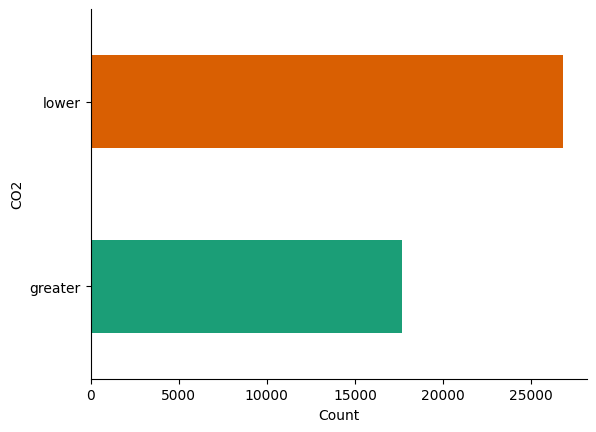

In [90]:

ax = merged_df.groupby('CO2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Count')
ax.set_ylabel('CO2')
plt.show()

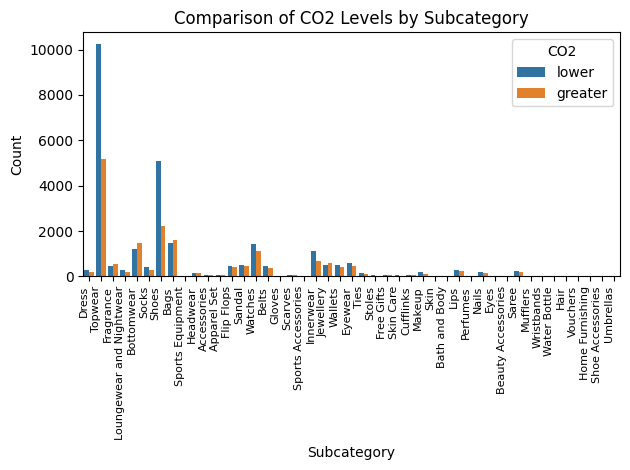

In [97]:
sns.countplot(data=merged_df, x='subCategory', hue='CO2')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.title('Comparison of CO2 Levels by Subcategory')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.legend(title='CO2')
plt.tight_layout()
plt.show()